In [87]:
#Importing the libraries to be used
#import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import collections
import re

#import panel as pn
#pn.extension('tabulator')
#!pip install hvplot
#import hvplot.pandas
!pip install dataframe_image
import dataframe_image as dfi

import tweepy as tw
from textblob import TextBlob
#!pip install pygal
#import pygal
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import bigrams
from textblob import TextBlob
import networkx # for creating networknodes
import networkx as nx
#from pandas.io.json import json_normalize

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
#import configparser
#!pip install tweepy
import tweepy
import pandas as pd

api_key = "CWW5rvfohMPrJaf4KuACiE0FN"
api_key_secret = "r6iRyGGXzY9iwQaxjAjA64WweBIUFZnPM6tVpVfUMIrx3zlGtq"

access_token = "3403682451-rwoiYIUkNtEeNDZ97ZoRzbI5daYm9vOKRnzXlan"
access_token_secret = "QdrHp0YVqfIdVpyZVhTgIUSnGsOnL24sWEQUqUdbhUxVK"

#authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

keywords = input("Enter the keyword to get tweets :: ")
keywords = keywords #Specify keywords to search for
limit = 1000 #Number of tweets to obtain


#limit at a time , we get 200.To solve this issue run code below.
tweets = tweepy.Cursor(api.search, q=keywords, count=200, tweet_mode = 'extended', wait_on_rate_limit=True).items(limit)

#Create DataFrame
columns = ['created_at', 'text', 'User']#, 'reply_count',	'retweet_count']#, 'user/location', 'user/followers_count']
data = []

for tweet in tweets:
  data.append([ tweet.created_at, tweet.full_text, tweet.user.screen_name])#, tweet.reply_count, tweet.retweet_count])# tweet.user.location, tweet.user.followers_count])

df = pd.DataFrame(data, columns=columns)
#df.rename(columns={"full_text": "text"}, inplace=True)

df.head(5)

Enter the keyword to get tweets :: inside radio


,created_at,text,User
0,2022-10-26 16:07:38,@schicknickshow This week’s episode is peak po...,RonDynasty
1,2022-10-26 16:06:00,🚨PODCAST🚨\n\n#TheRack Extra Reviews: The Big B...,RackRadioShow
2,2022-10-26 16:05:26,RT @UniNhantsNews: How did @tompradio feel bei...,KirstyLAllan1
3,2022-10-26 15:58:07,#NowPlaying Tim Hazelton - Dead Inside at http...,rpmradiostream
4,2022-10-26 15:55:29,"@tslycha I never heard it like that, but they ...",Studio8502


In [89]:
#Checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  1000 non-null   datetime64[ns]
 1   text        1000 non-null   object        
 2   User        1000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.6+ KB


In [90]:
#Removing the duplicates
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  1000 non-null   datetime64[ns]
 1   text        1000 non-null   object        
 2   User        1000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 31.2+ KB


In [91]:
#Convert the created_at column to datetime datatype
df['created_at'] = df['created_at'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  1000 non-null   datetime64[ns]
 1   text        1000 non-null   object        
 2   User        1000 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 31.2+ KB


## Checking the Date ranges and the peak hours

In [92]:
#Creating a column for hour
df['hour'] = df['created_at'].dt.hour
#Creating a column for days
df['date'] = df['created_at'].dt.date
#Creating a column for month
df['month'] = df['created_at'].dt.month
df.head()

,created_at,text,User,hour,date,month
0,2022-10-26 16:07:38,@schicknickshow This week’s episode is peak po...,RonDynasty,16,2022-10-26,10
1,2022-10-26 16:06:00,🚨PODCAST🚨\n\n#TheRack Extra Reviews: The Big B...,RackRadioShow,16,2022-10-26,10
2,2022-10-26 16:05:26,RT @UniNhantsNews: How did @tompradio feel bei...,KirstyLAllan1,16,2022-10-26,10
3,2022-10-26 15:58:07,#NowPlaying Tim Hazelton - Dead Inside at http...,rpmradiostream,15,2022-10-26,10
4,2022-10-26 15:55:29,"@tslycha I never heard it like that, but they ...",Studio8502,15,2022-10-26,10


In [93]:
#Checking the unique dates
df['date'].value_counts()#Checking the unique dates

2022-10-24    292
2022-10-25    275
2022-10-23    229
2022-10-26    135
2022-10-22     69
Name: date, dtype: int64

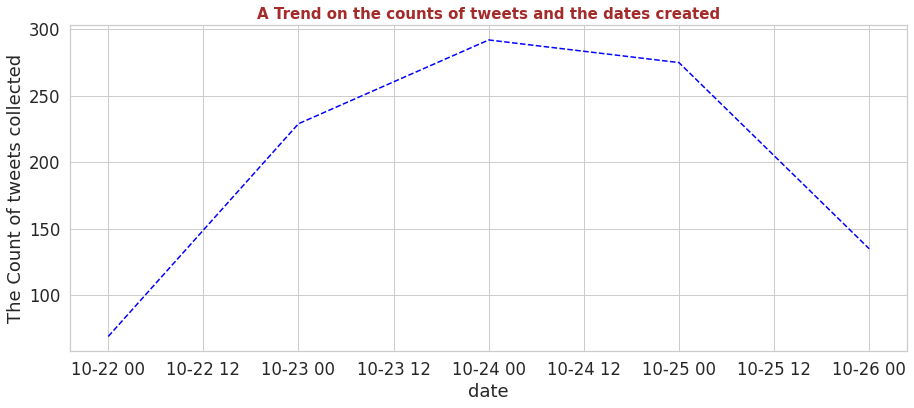

In [94]:
# time series showing when the tweets for this analysis was created
reactions = df.groupby(['date']).count()
ax = reactions.text.plot(figsize=(15,6),ls='--',c='blue')
plt.ylabel('The Count of tweets collected')
plt.title('A Trend on the counts of tweets and the dates created' , fontsize=15, color= 'brown', fontweight='bold')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

In [95]:
reactions = df.groupby(['hour']).count().sort_values(by='created_at',ascending=0)
reactions.head()

,created_at,text,User,date,month
hour,,,,,
23,80,80,80,80,80
16,73,73,73,73,73
17,67,67,67,67,67
22,63,63,63,63,63
1,52,52,52,52,52


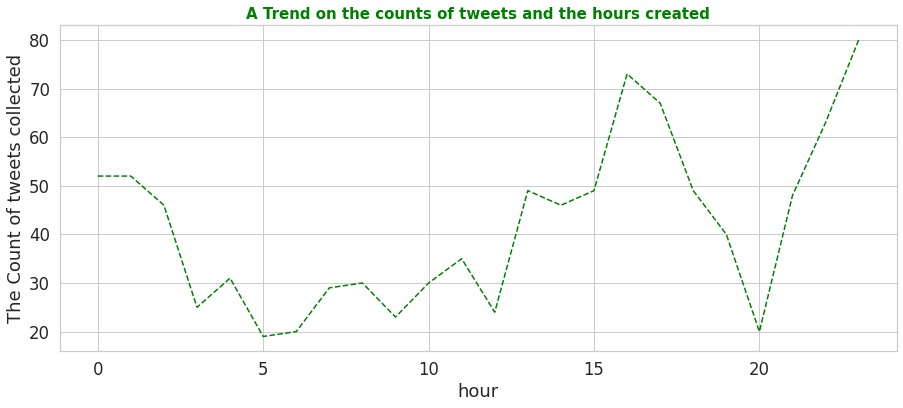

In [96]:
# time series plot for the most active hours for tweeting
reactions = df.groupby(['hour']).count()
ax = reactions.text.plot(figsize=(15,6),ls='--',c='green')
plt.ylabel('The Count of tweets collected')
plt.title('A Trend on the counts of tweets and the hours created',  fontsize=15, color= 'green', fontweight='bold')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

## Exploratory Data Analysis (EDA)

In [97]:
#Creating a copy for the text column This will enable us work with the text column solely
df_tweets = df[['text']].copy()
df_tweets.tail(5)

,text
995,Inside the fascinating world of “ham radio” QS...
996,"RT @SEFFLisnaskea: Remember Dominic Donnelly, ..."
997,RT @MacFarlaneNews: Justice Dept will seek 3-m...
998,RT @MacFarlaneNews: Justice Dept will seek 3-m...
999,RT @MacFarlaneNews: Justice Dept will seek 3-m...


In [98]:
#Dropping the duplicates
df_tweets = df_tweets.drop_duplicates()

In [99]:
df_tweets.tail(5)


,text
967,RT @FoxSportsRadio: NOW: Live inside the @tire...
968,@goosewithshoes1 @HisServant0 @hogzzwild @Buck...
972,NOW: Live inside the @tirerack Studios.. @cann...
991,Why small business owners need to understand t...
995,Inside the fascinating world of “ham radio” QS...


## Text Processing

In [100]:
#A Function for cleaning the file (The text column in it)
def text_clean(df_tweets):
  #Lowercasing all the letters
  df_tweets['text'] = df_tweets['text'].str.lower() 

  #Removes mentions containing rt word
  df_tweets['text'] = df_tweets['text'].str.replace(r'rt @[A-Za-z0-9_]+:', '', regex=True) 
  #Removes mention just containing @word only
  df_tweets['text'] = df_tweets['text'].str.replace(r'@[A-Za-z0-9_]+', '', regex=True) 
  #Removing #tags 
  #df_tweets['text'] = df_tweets['text'].str.replace(r'#[A-Za-z0-9_]+', '', regex=True)  

  #Removing links
  df_tweets['text'] = df_tweets['text'].str.replace(r'http\S+', '', regex=True)
  df_tweets['text'] = df_tweets['text'].str.replace(r'www.\S+', '', regex=True) 

  #Removing punctuations and replacing with a single space
  df_tweets['text'] = df_tweets['text'].str.replace(r'[()!?]', ' ', regex=True)  
  df_tweets['text'] = df_tweets['text'].str.replace(r'\[.*?\]', ' ', regex=True)

  #Filtering non-alphanumeric characters
  df_tweets['text'] = df_tweets['text'].str.replace(r'[^a-z0-9]', ' ', regex=True) 

  #Removing Stoping words + keywords_to_hear
  stop = stopwords.words(['english', 'spanish', 'portuguese']) + ['l','pez', 'n', 'andr','p', 'si','est', 'c', 'qu']
  df_tweets['tweet_without_stopwords'] = df_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [101]:
#preview of the data before cleaning
df_tweets.head()

,text
0,@schicknickshow This week’s episode is peak po...
1,🚨PODCAST🚨\n\n#TheRack Extra Reviews: The Big B...
2,RT @UniNhantsNews: How did @tompradio feel bei...
3,#NowPlaying Tim Hazelton - Dead Inside at http...
4,"@tslycha I never heard it like that, but they ..."


In [102]:
text_clean(df_tweets)
# tokenize the tweets
df_tweets['tokenized_sents'] = df_tweets.apply(lambda row: nltk.word_tokenize(row['tweet_without_stopwords']), axis=1)
df_tweets.head() #preview of the data after cleaning

,text,tweet_without_stopwords,tokenized_sents
0,this week s episode is peak podcast we ve no...,week episode peak podcast totally devolved com...,"[week, episode, peak, podcast, totally, devolv..."
1,podcast therack extra reviews the big ban...,podcast therack extra reviews big bang theory ...,"[podcast, therack, extra, reviews, big, bang, ..."
2,how did feel being inside our isolation flot...,feel inside isolation flotation tank discuss t...,"[feel, inside, isolation, flotation, tank, dis..."
3,nowplaying tim hazelton dead inside at,nowplaying tim hazelton dead inside,"[nowplaying, tim, hazelton, dead, inside]"
4,i never heard it like that but they did ra...,never heard like radio play song whose written...,"[never, heard, like, radio, play, song, whose,..."


### Visualizing/InfoGraphics the text column (Unigram)

In [103]:
# Create a list of lists containing words for each tweet
words_in_tweet = list(df_tweets['tokenized_sents'])
words_in_tweet[:2]

[['week',
  'episode',
  'peak',
  'podcast',
  'totally',
  'devolved',
  'completely',
  'forgetting',
  'trying',
  'make',
  'sound',
  'like',
  'professional',
  'radio',
  'show',
  'instead',
  'giggling',
  'together',
  'inside',
  'jokes',
  'perfect'],
 ['podcast',
  'therack',
  'extra',
  'reviews',
  'big',
  'bang',
  'theory',
  'definitive',
  'inside',
  'story',
  'epic',
  'hit',
  'series',
  'ways',
  'listen']]

In [104]:
#Calculate word frequencies
# List of all words across tweets
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts_words = collections.Counter(all_words)

counts_words.most_common(15)

[('inside', 467),
 ('radio', 378),
 ('listen', 59),
 ('live', 52),
 ('music', 48),
 ('app', 41),
 ('playing', 39),
 ('amp', 38),
 ('nowplaying', 32),
 ('nice', 31),
 ('play', 28),
 ('2', 26),
 ('like', 25),
 ('right', 25),
 ('show', 24)]

In [105]:
# transform the list into a pandas dataframe
df_counts_words = pd.DataFrame(counts_words.most_common(15),
                             columns=['words', 'count'])

df_counts_words.head(10)

,words,count
0,inside,467
1,radio,378
2,listen,59
3,live,52
4,music,48
5,app,41
6,playing,39
7,amp,38
8,nowplaying,32
9,nice,31


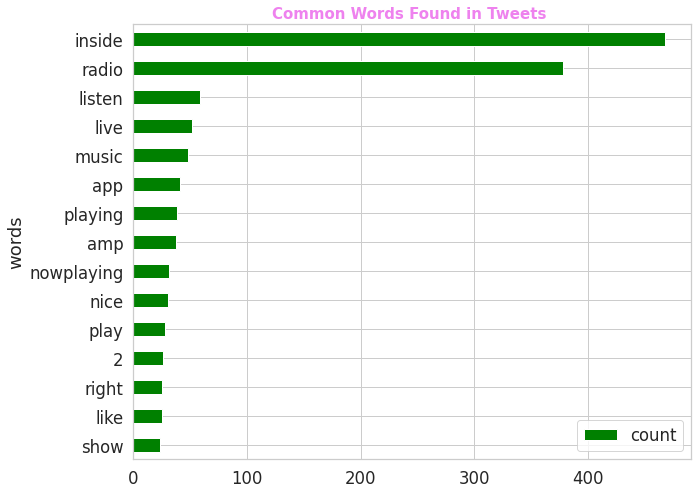

In [106]:
#A horizontal bar graph to visualize the most common words
fig, ax = plt.subplots(figsize=(10, 8))

# Plot horizontal bar graph
df_counts_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets ",  fontsize=15, color= 'violet', fontweight='bold')
plt.savefig('count_unigram.png')
plt.show()

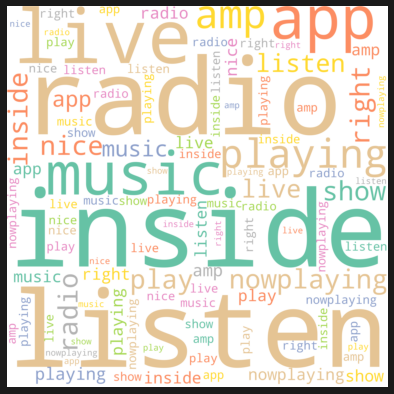

In [107]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud2 = WordCloud(background_color="white",
                       max_words=100,
                       height=3000, width=3000,
                       colormap='Set2',
                       collocations=False,
                       repeat=True).generate(' '.join(df_counts_words["words"]))
# Generate plot
plt.figure(figsize=(10,7), facecolor='k')

plt.tight_layout(pad=0)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud_uni.png')
plt.show()

## Collection of Words – Bigrams

In [108]:
#Create a list of tokenized_sents
tweets_words = list(df_tweets['tokenized_sents'])
tweets_words[2]

['feel',
 'inside',
 'isolation',
 'flotation',
 'tank',
 'discuss',
 'taking',
 'part',
 'morning',
 'parapsych']

In [109]:
#Remove any empty lists
tweets_words_new = [x for x in tweets_words if x != []]
tweets_words_new[2]

['feel',
 'inside',
 'isolation',
 'flotation',
 'tank',
 'discuss',
 'taking',
 'part',
 'morning',
 'parapsych']

In [110]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_words_new]

# View bigrams for the first tweet
terms_bigram[2]

[('feel', 'inside'),
 ('inside', 'isolation'),
 ('isolation', 'flotation'),
 ('flotation', 'tank'),
 ('tank', 'discuss'),
 ('discuss', 'taking'),
 ('taking', 'part'),
 ('part', 'morning'),
 ('morning', 'parapsych')]

In [111]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('inside', 'radio'), 28),
 (('live', 'inside'), 24),
 (('google', 'play'), 19),
 (('st', 'louis'), 18),
 (('deep', 'inside'), 17),
 (('football', 'radio'), 16),
 (('radio', 'show'), 15),
 (('inside', 'mix'), 15),
 (('mix', 'right'), 15),
 (('right', 'nice'), 15),
 (('nice', 'radio'), 15),
 (('radio', 'app'), 15),
 (('app', 'available'), 15),
 (('available', 'app'), 15),
 (('app', 'store'), 15),
 (('store', 'apple'), 14),
 (('apple', 'google'), 14),
 (('play', 'android'), 14),
 (('android', 'lock'), 14),
 (('lock', 'nice'), 14)]

In [112]:
#Creating a dataframe of the most common bigrams
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(inside, radio)",28
1,"(live, inside)",24
2,"(google, play)",19
3,"(st, louis)",18
4,"(deep, inside)",17
5,"(football, radio)",16
6,"(radio, show)",15
7,"(inside, mix)",15
8,"(mix, right)",15
9,"(right, nice)",15
